## HT3 - Proyecto 2. Entrega 1
### Modelos de Regresión Lineal
Diego Duarte 22075 - José Marchena 22398

#### Analisis Exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import funciones

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

In [3]:
print(house_prices.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
cuantitiativas = house_prices.select_dtypes(include=['int64', 'float64']).columns.tolist()
cualitativas = house_prices.select_dtypes(include=['object']).columns.tolist()

print(cuantitiativas)
print(cualitativas)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

In [5]:
# Utilizados para conocer si las variables pueden representar un valor cualitativo
print(house_prices['MSSubClass'].unique())
print(house_prices['OverallQual'].unique())
print(house_prices['LowQualFinSF'].unique())
print(house_prices['BsmtFullBath'].unique())
print(house_prices['BsmtHalfBath'].unique())
print(house_prices['KitchenAbvGr'].unique())
print(house_prices['MoSold'].unique())

cuantitiativas.remove('MSSubClass')
cuantitiativas.remove('MoSold')
cualitativas.append('MSSubClass')
cualitativas.append('MoSold')

#El Id no nos sirve en el analisis
cuantitiativas.remove('Id')

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
[ 7  6  8  5  9  4 10  3  1  2]
[  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]
[1 0 2 3]
[0 1 2]
[1 2 3 0]
[ 2  5  9 12 10  8 11  4  1  7  3  6]


***LotFrontage***
Estadístico de prueba (ks_statistic) = 0.10447205487401189927
p-value = 0.00000000000723401475
Se rechaza la hipótesis nula: los datos de 'LotFrontage' NO provienen de una distribución normal.



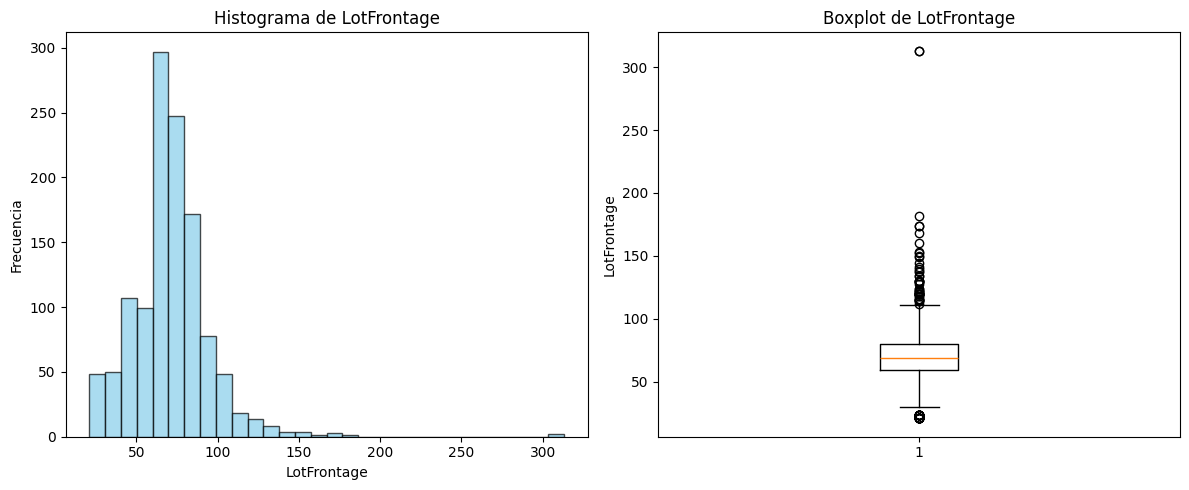



***LotArea***
Estadístico de prueba (ks_statistic) = 0.25146904348964016496
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'LotArea' NO provienen de una distribución normal.



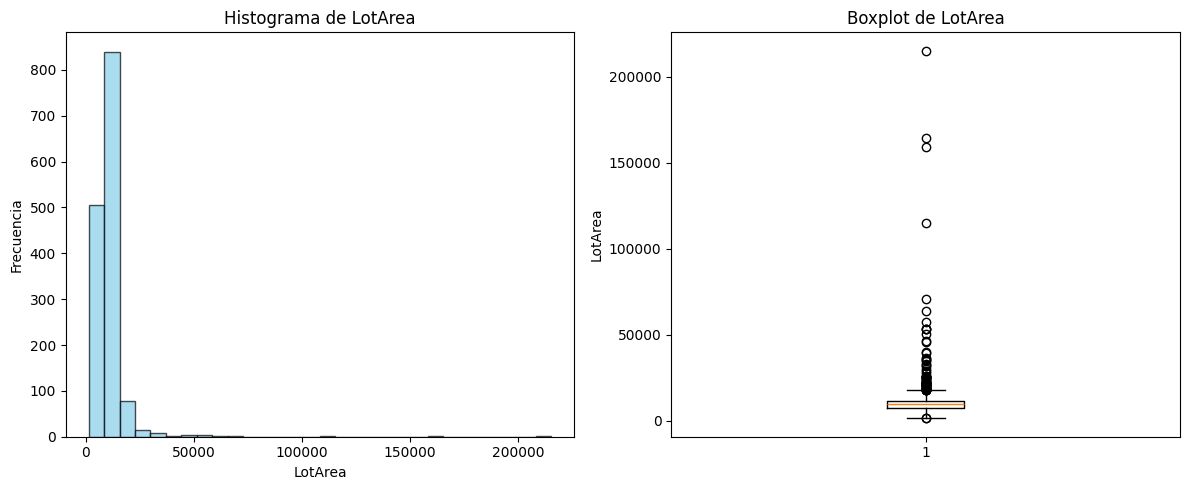



***OverallQual***
Estadístico de prueba (ks_statistic) = 0.15523045240535604528
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'OverallQual' NO provienen de una distribución normal.



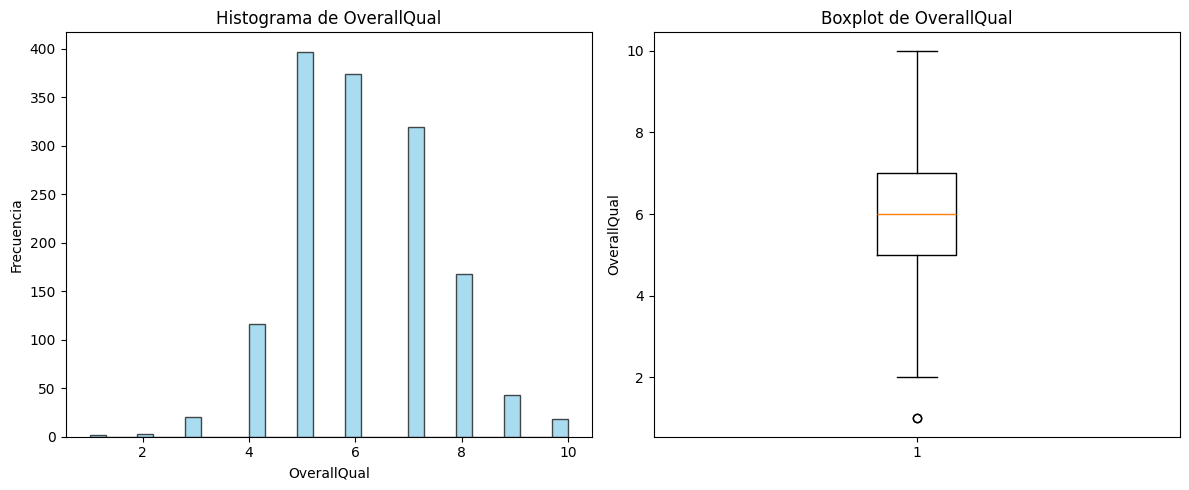



***OverallCond***
Estadístico de prueba (ks_statistic) = 0.32009439633252723123
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'OverallCond' NO provienen de una distribución normal.



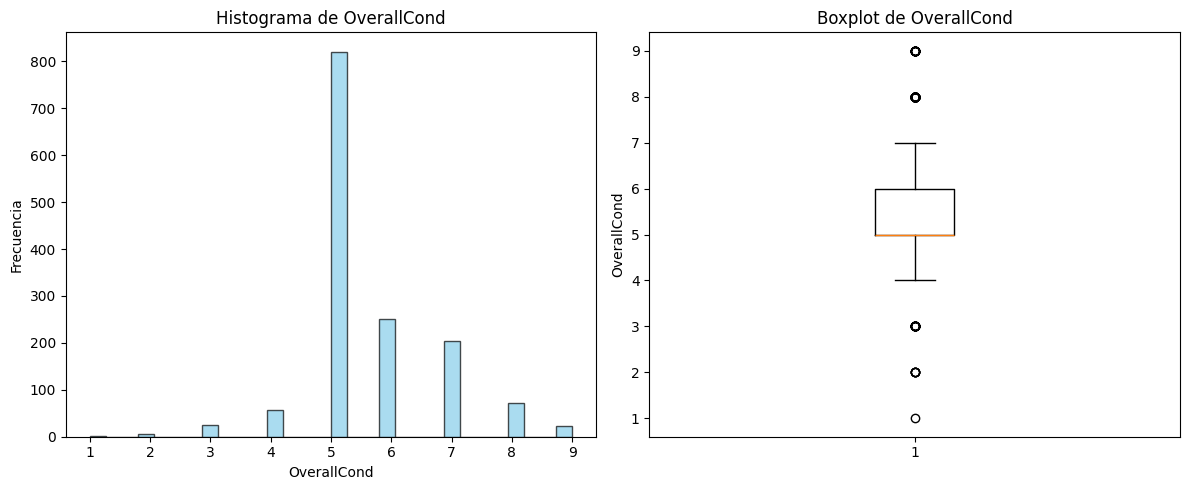



***YearBuilt***
Estadístico de prueba (ks_statistic) = 0.12102104059878149300
p-value = 0.00000000000000000043
Se rechaza la hipótesis nula: los datos de 'YearBuilt' NO provienen de una distribución normal.



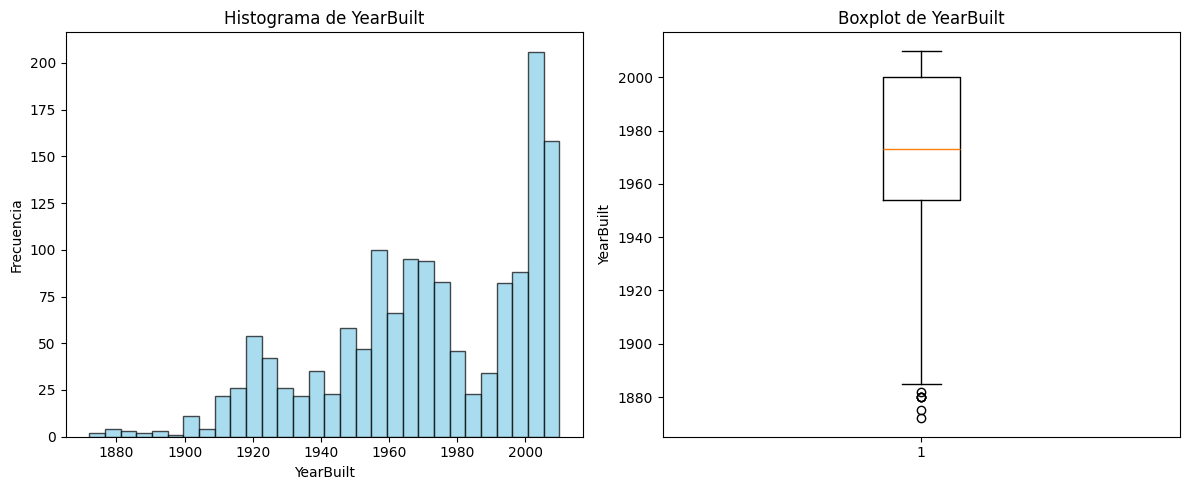



***YearRemodAdd***
Estadístico de prueba (ks_statistic) = 0.17460226465795025685
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'YearRemodAdd' NO provienen de una distribución normal.



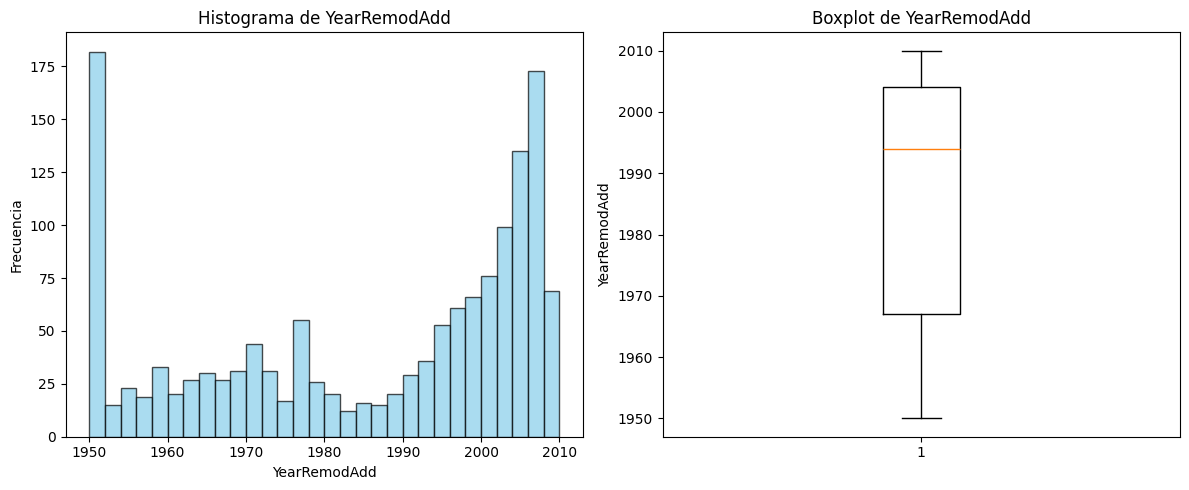



***MasVnrArea***
Estadístico de prueba (ks_statistic) = 0.12376406278743445899
p-value = 0.00000002387694009518
Se rechaza la hipótesis nula: los datos de 'MasVnrArea' NO provienen de una distribución normal.



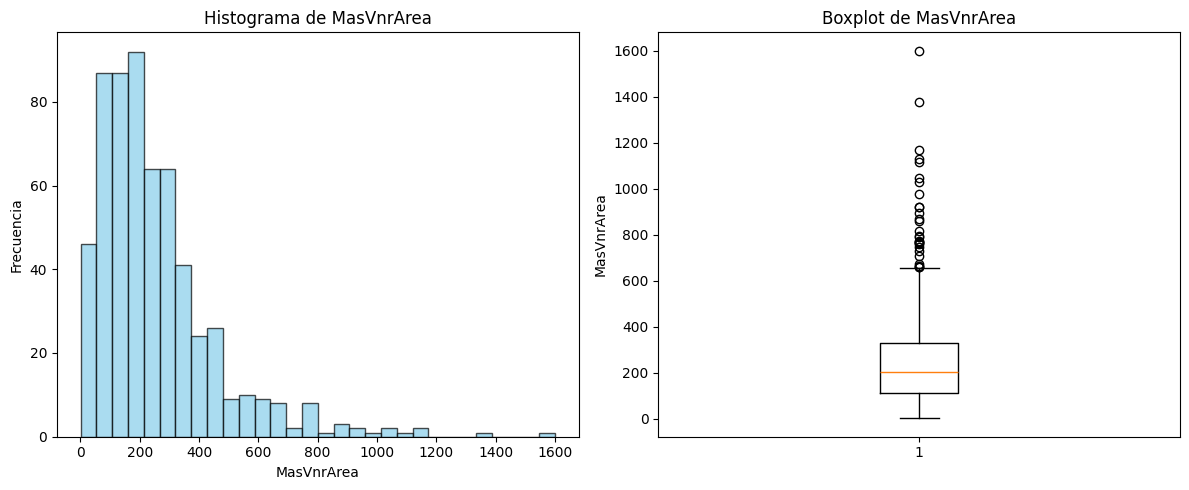



***BsmtFinSF1***
Estadístico de prueba (ks_statistic) = 0.07824075493569671025
p-value = 0.00000982578619542059
Se rechaza la hipótesis nula: los datos de 'BsmtFinSF1' NO provienen de una distribución normal.



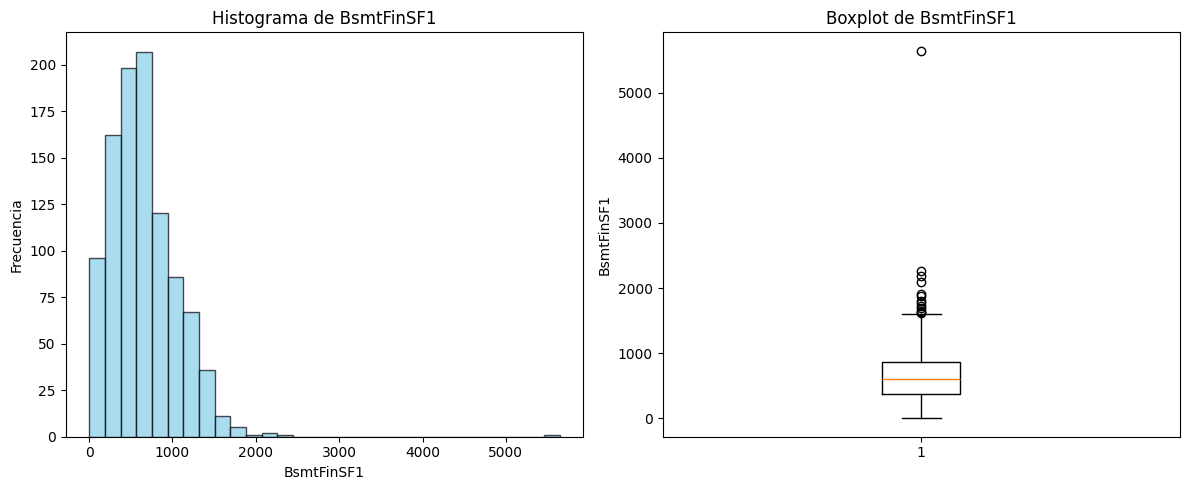



***BsmtFinSF2***
Estadístico de prueba (ks_statistic) = 0.10366232526210483744
p-value = 0.05134981246596848070
No se rechaza la hipótesis nula: los datos de 'BsmtFinSF2' parecen provenir de una distribución normal.



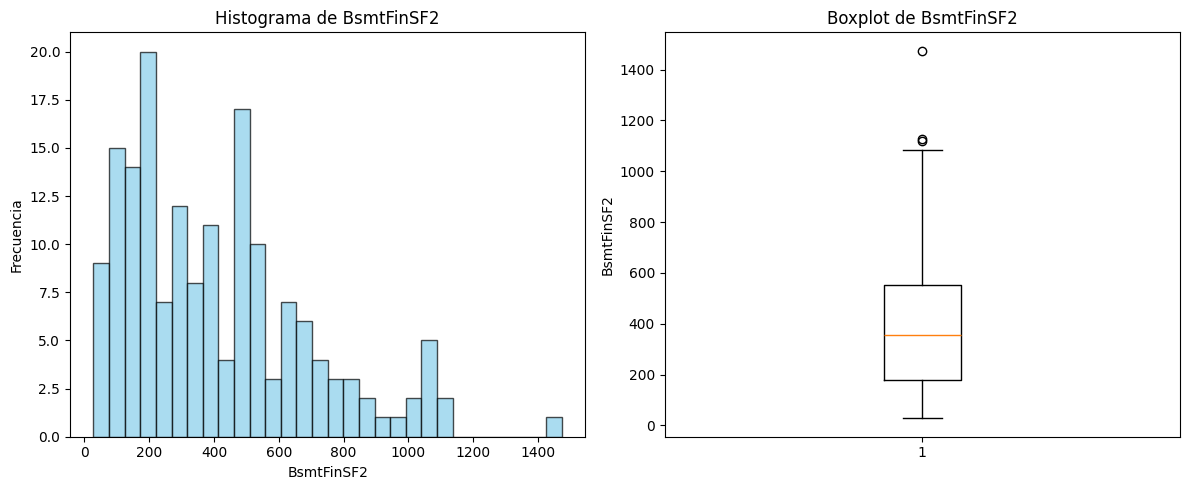



***BsmtUnfSF***
Estadístico de prueba (ks_statistic) = 0.08881017317189798810
p-value = 0.00000000116643528412
Se rechaza la hipótesis nula: los datos de 'BsmtUnfSF' NO provienen de una distribución normal.



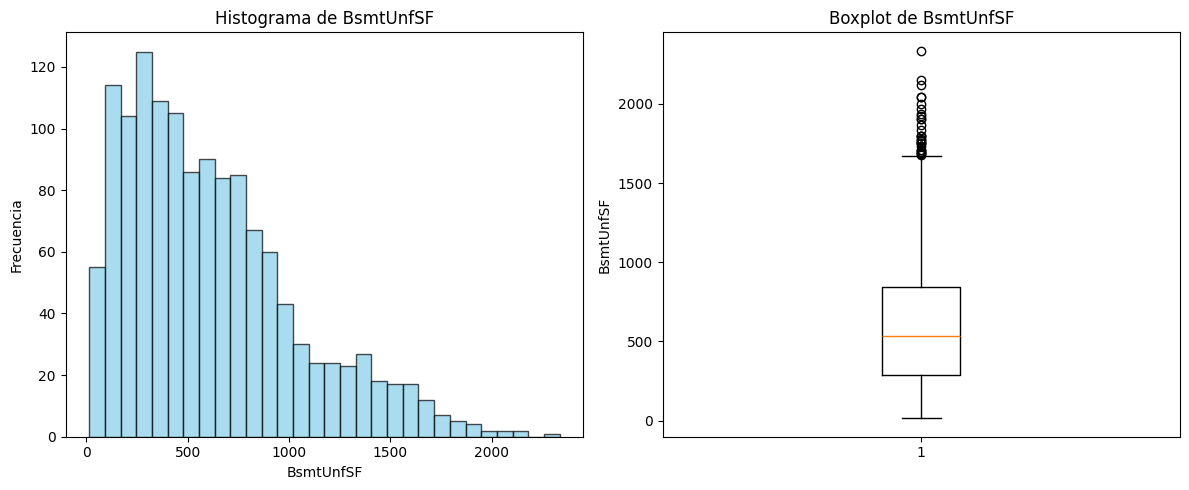



***TotalBsmtSF***
Estadístico de prueba (ks_statistic) = 0.07593952292488681532
p-value = 0.00000009069791178247
Se rechaza la hipótesis nula: los datos de 'TotalBsmtSF' NO provienen de una distribución normal.



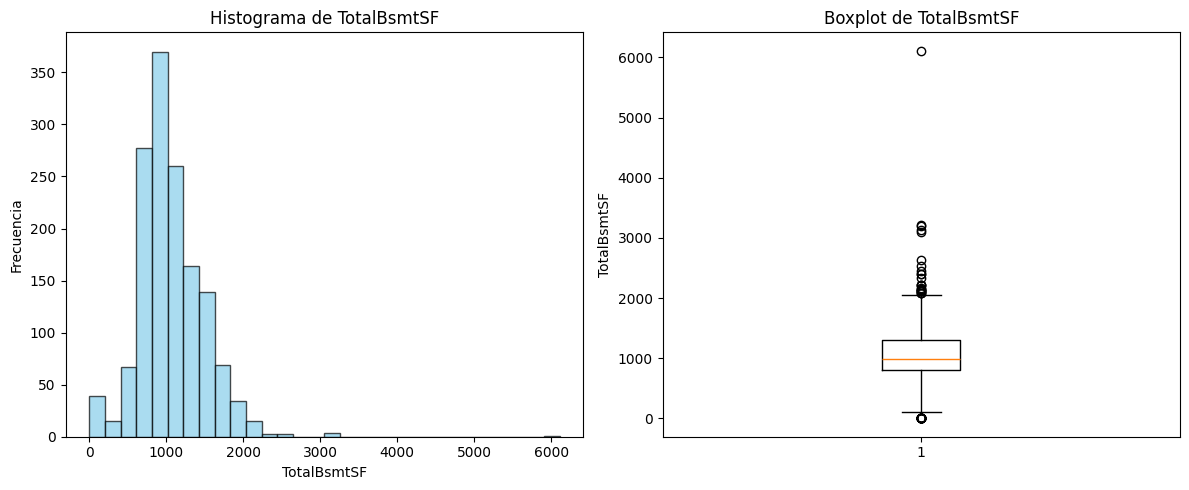



***1stFlrSF***
Estadístico de prueba (ks_statistic) = 0.08691902539030016417
p-value = 0.00000000047910297651
Se rechaza la hipótesis nula: los datos de '1stFlrSF' NO provienen de una distribución normal.



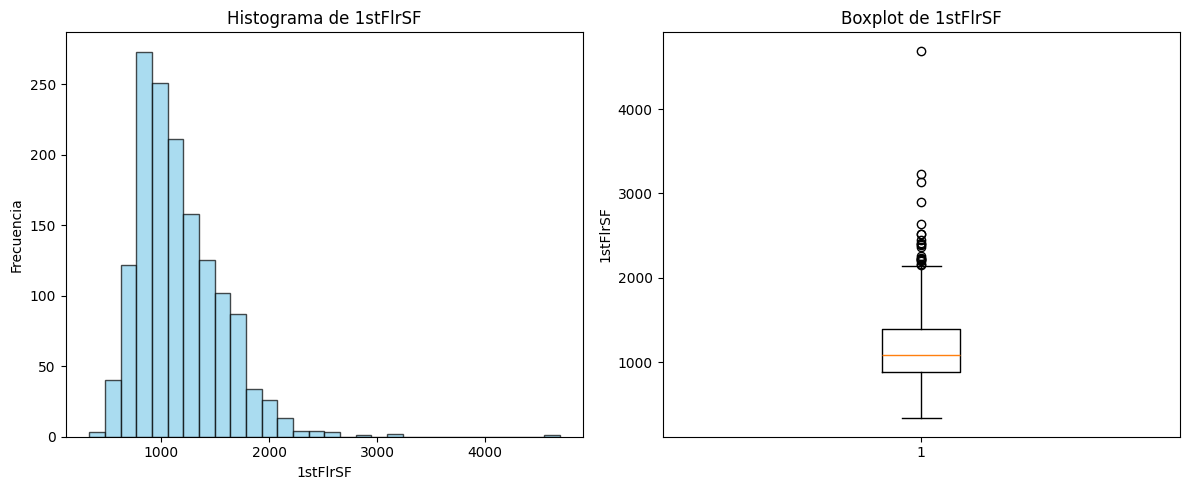



***2ndFlrSF***
Estadístico de prueba (ks_statistic) = 0.08459064426645801493
p-value = 0.00022376280275689071
Se rechaza la hipótesis nula: los datos de '2ndFlrSF' NO provienen de una distribución normal.



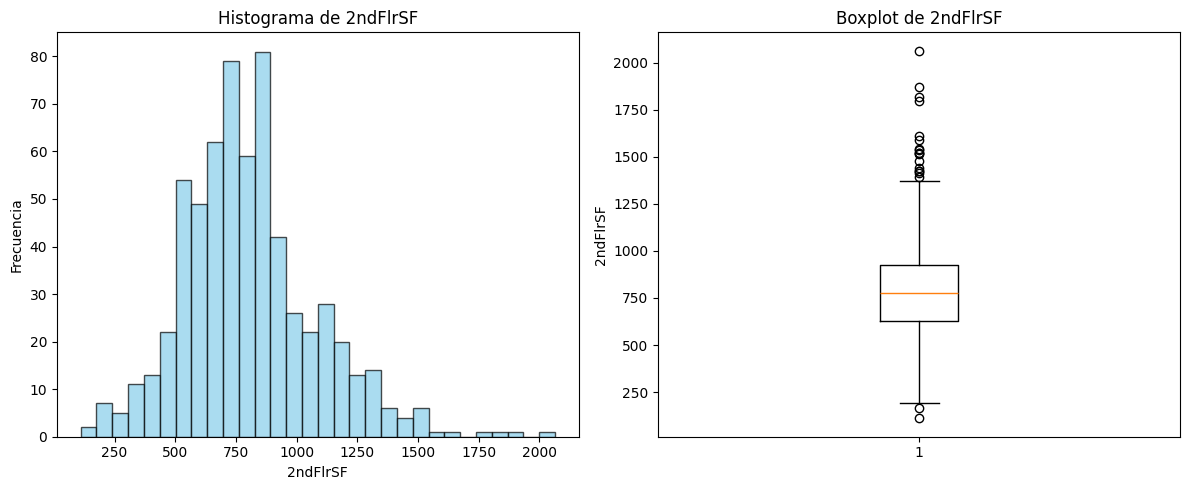



***LowQualFinSF***
Estadístico de prueba (ks_statistic) = 0.19230487009818358901
p-value = 0.25663718932099255365
No se rechaza la hipótesis nula: los datos de 'LowQualFinSF' parecen provenir de una distribución normal.



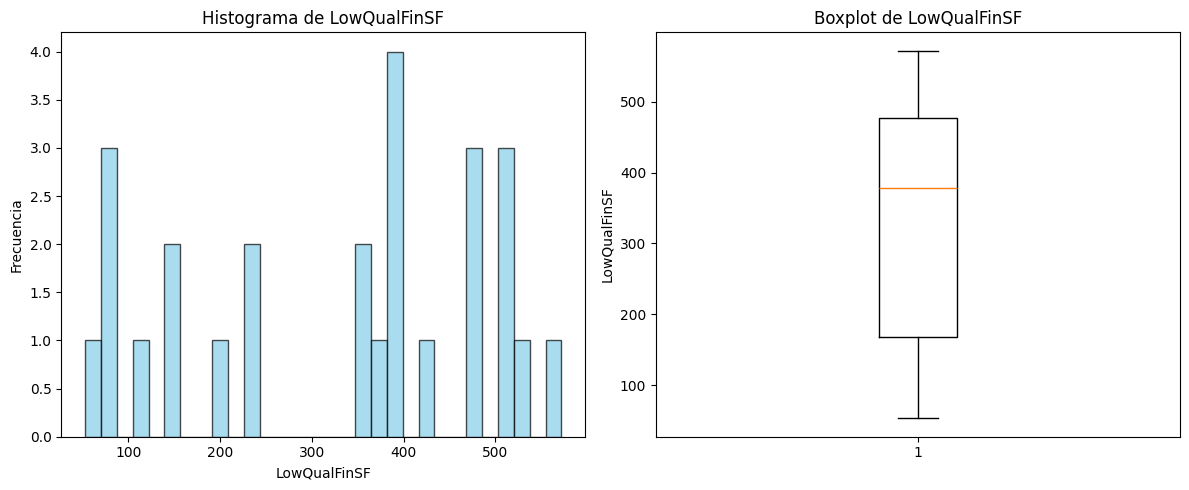



***GrLivArea***
Estadístico de prueba (ks_statistic) = 0.06746422821216169208
p-value = 0.00000319638564181046
Se rechaza la hipótesis nula: los datos de 'GrLivArea' NO provienen de una distribución normal.



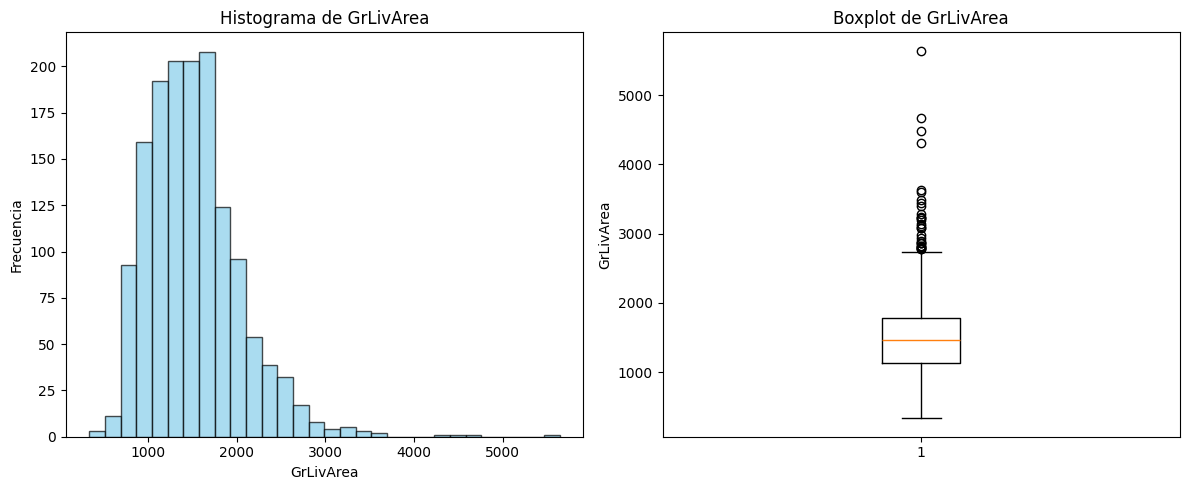



***BedroomAbvGr***
Estadístico de prueba (ks_statistic) = 0.28148584016671784891
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'BedroomAbvGr' NO provienen de una distribución normal.



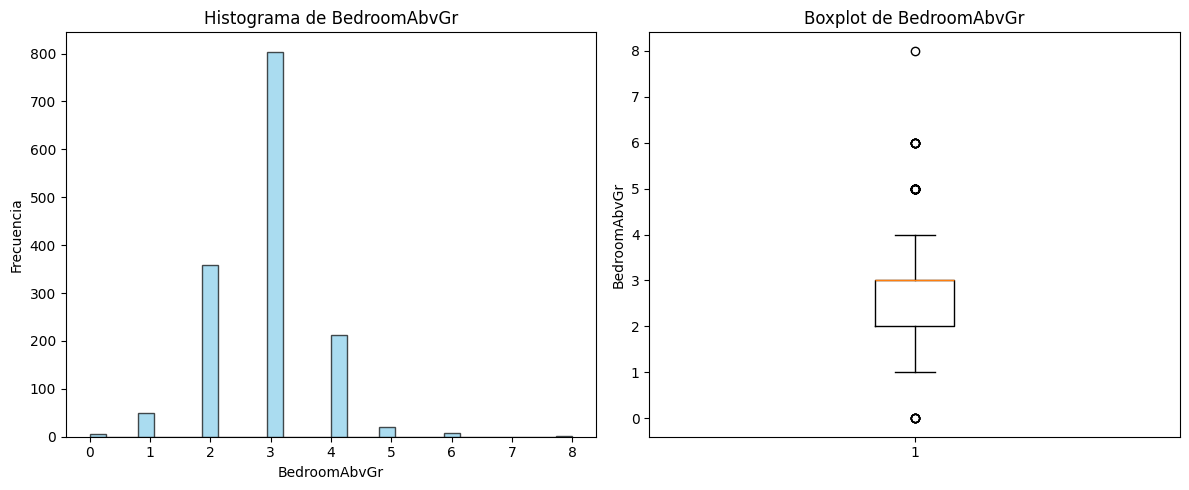



***TotRmsAbvGrd***
Estadístico de prueba (ks_statistic) = 0.16748240064141528549
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'TotRmsAbvGrd' NO provienen de una distribución normal.



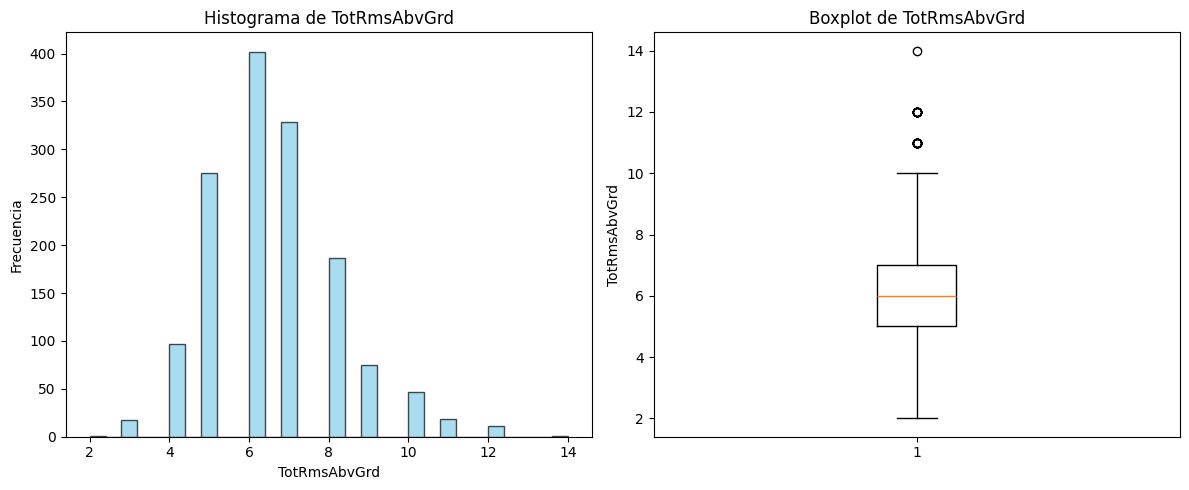



***GarageYrBlt***
Estadístico de prueba (ks_statistic) = 0.12757418726210723037
p-value = 0.00000000000000000005
Se rechaza la hipótesis nula: los datos de 'GarageYrBlt' NO provienen de una distribución normal.



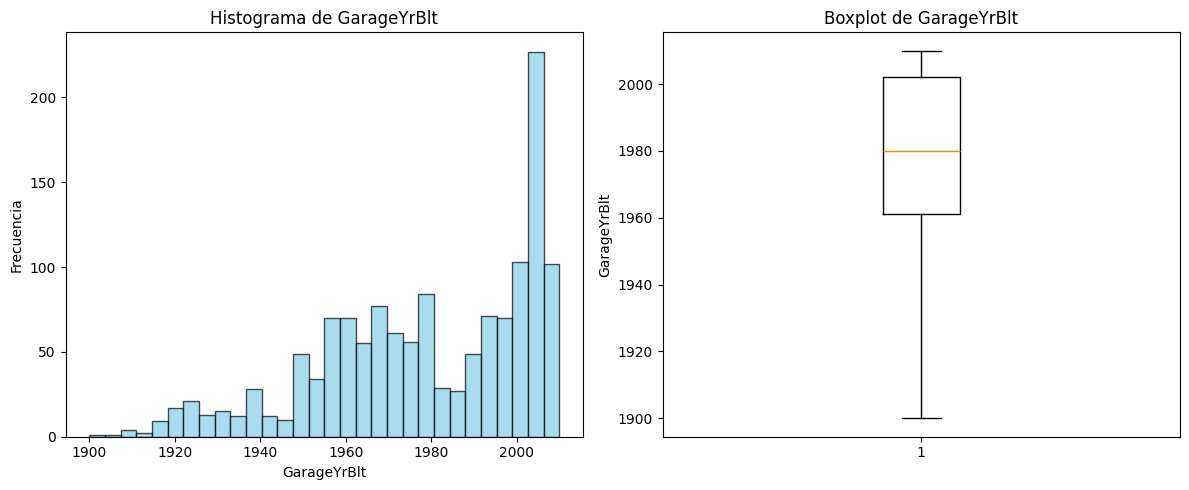



***GarageArea***
Estadístico de prueba (ks_statistic) = 0.07528339704878073135
p-value = 0.00000012131559844146
Se rechaza la hipótesis nula: los datos de 'GarageArea' NO provienen de una distribución normal.



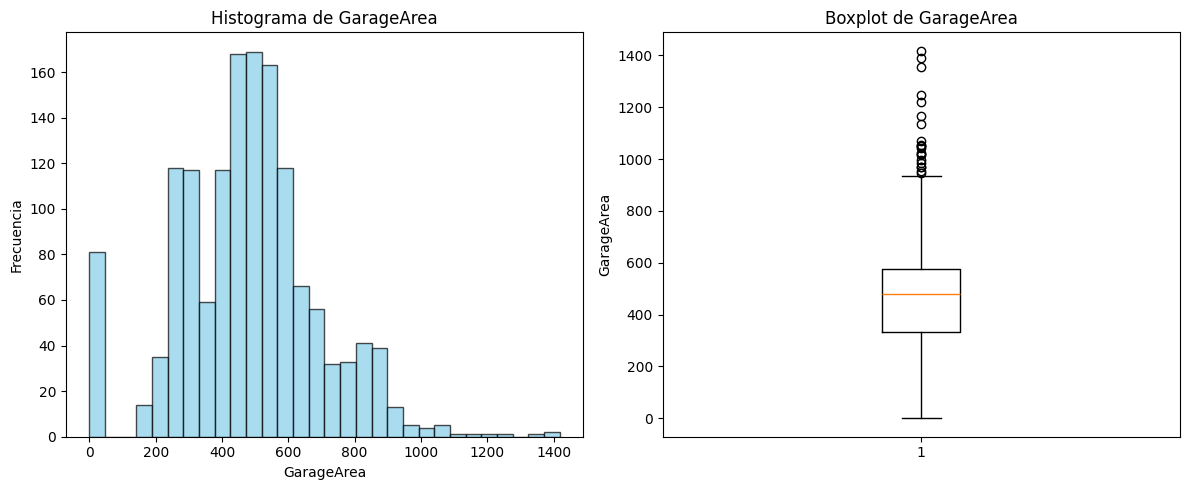



***WoodDeckSF***
Estadístico de prueba (ks_statistic) = 0.12543891505085835725
p-value = 0.00000000047924194542
Se rechaza la hipótesis nula: los datos de 'WoodDeckSF' NO provienen de una distribución normal.



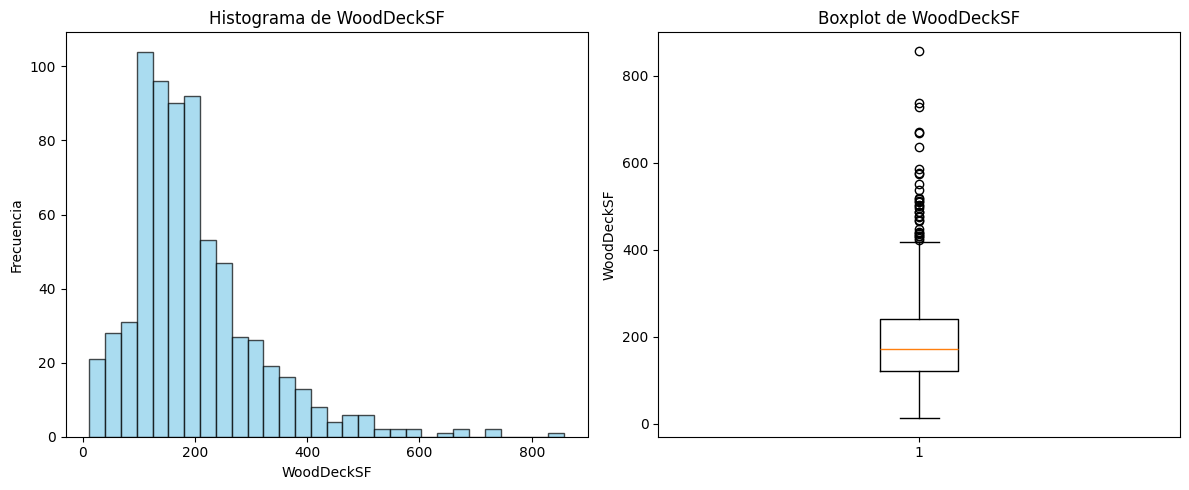



***OpenPorchSF***
Estadístico de prueba (ks_statistic) = 0.15742228443806632887
p-value = 0.00000000000000000720
Se rechaza la hipótesis nula: los datos de 'OpenPorchSF' NO provienen de una distribución normal.



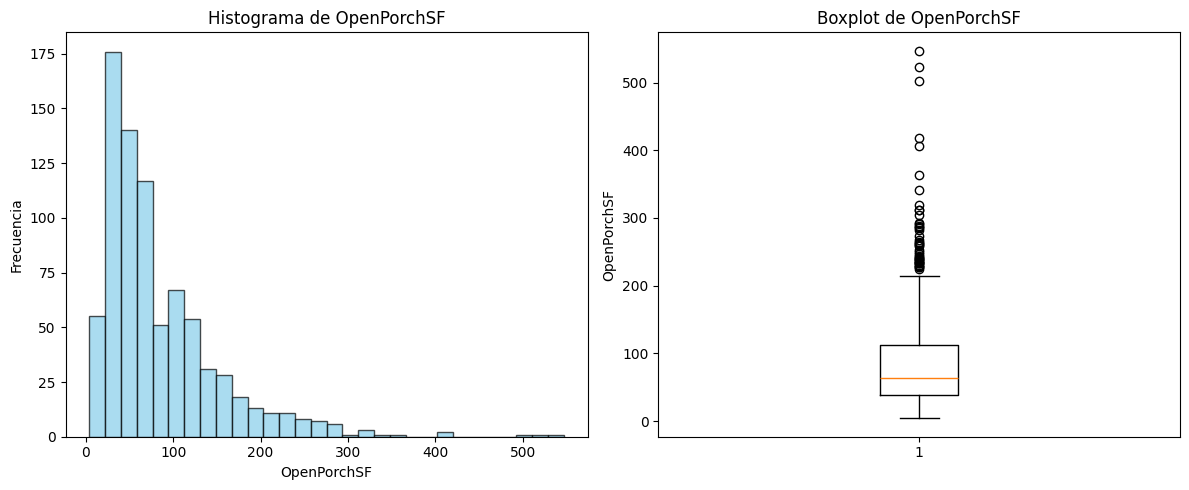



***EnclosedPorch***
Estadístico de prueba (ks_statistic) = 0.07134036259736109553
p-value = 0.22917263590338987633
No se rechaza la hipótesis nula: los datos de 'EnclosedPorch' parecen provenir de una distribución normal.



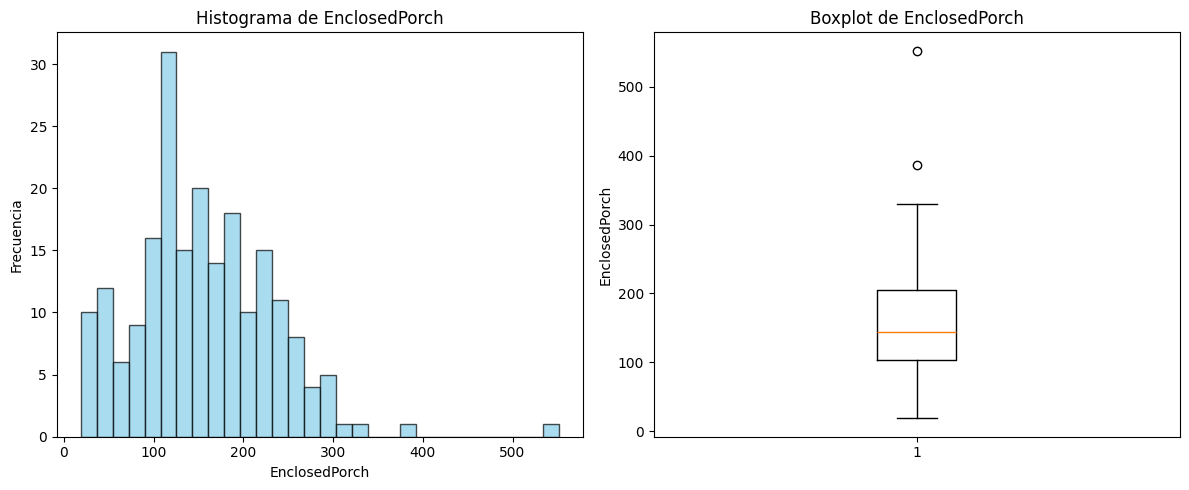



***3SsnPorch***
Estadístico de prueba (ks_statistic) = 0.18396395854341418552
p-value = 0.34770579091415720896
No se rechaza la hipótesis nula: los datos de '3SsnPorch' parecen provenir de una distribución normal.



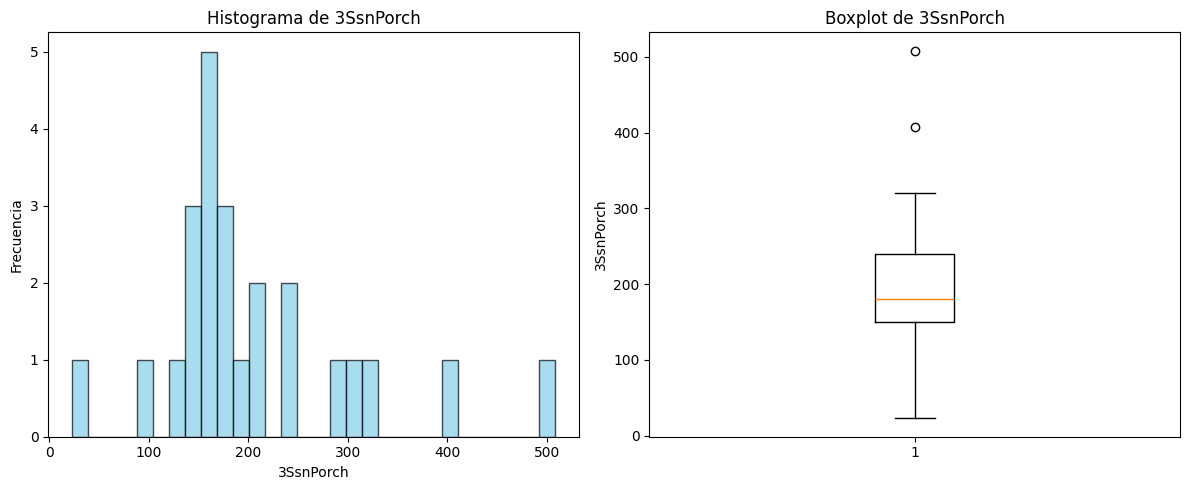



***ScreenPorch***
Estadístico de prueba (ks_statistic) = 0.13615686603114729447
p-value = 0.02451151820985830732
Se rechaza la hipótesis nula: los datos de 'ScreenPorch' NO provienen de una distribución normal.



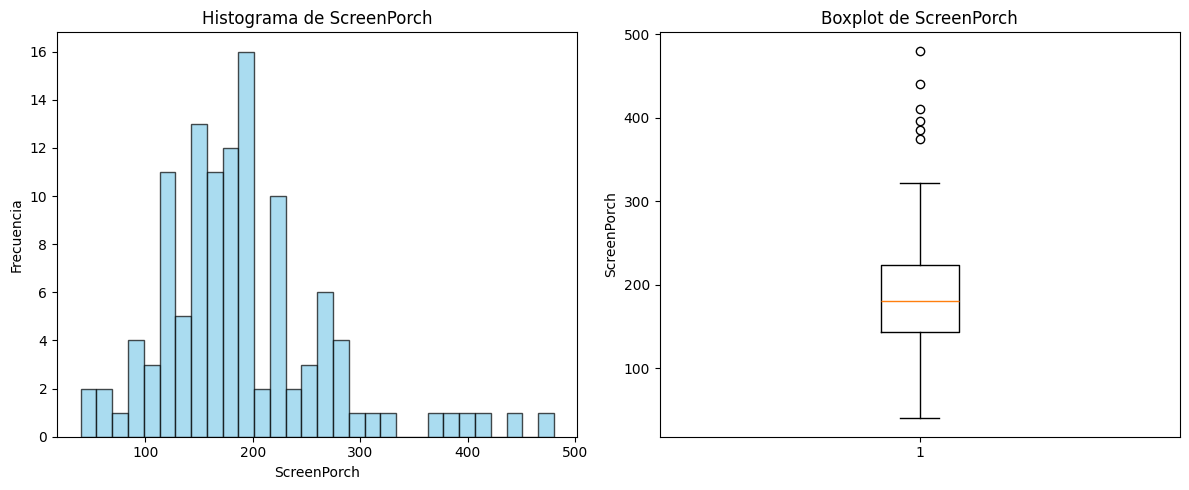



***PoolArea***
Estadístico de prueba (ks_statistic) = 0.21154495663519734538
p-value = 0.85431846228735208726
No se rechaza la hipótesis nula: los datos de 'PoolArea' parecen provenir de una distribución normal.



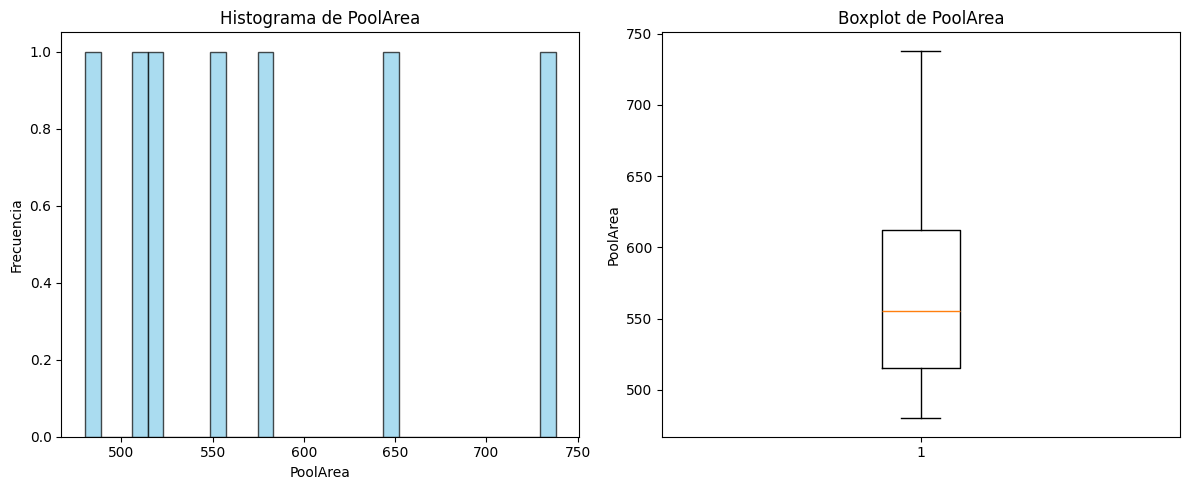



***MiscVal***
Estadístico de prueba (ks_statistic) = 0.33553350759646333179
p-value = 0.00001007772934356749
Se rechaza la hipótesis nula: los datos de 'MiscVal' NO provienen de una distribución normal.



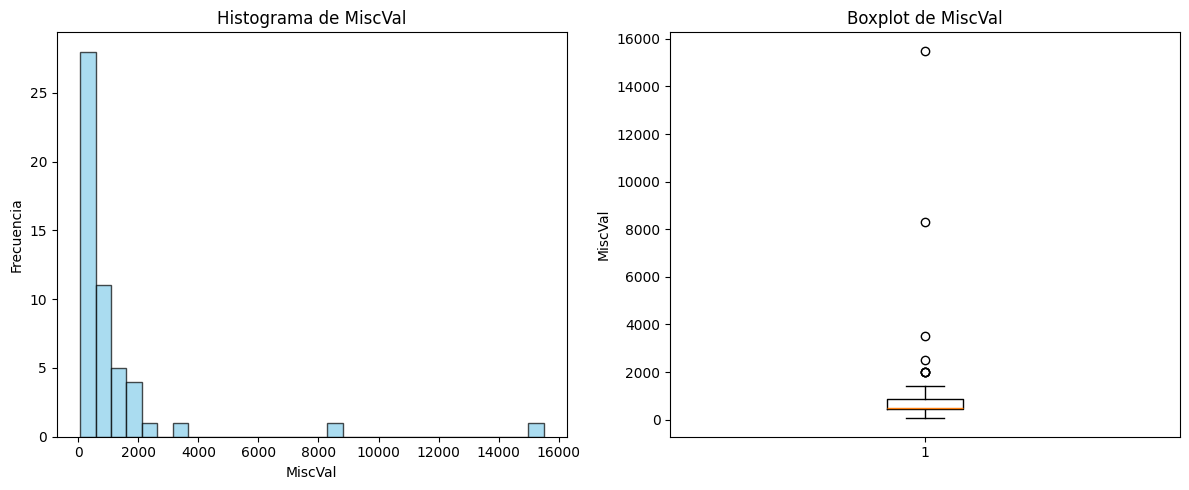



***SalePrice***
Estadístico de prueba (ks_statistic) = 0.12366990729158056084
p-value = 0.00000000000000000006
Se rechaza la hipótesis nula: los datos de 'SalePrice' NO provienen de una distribución normal.



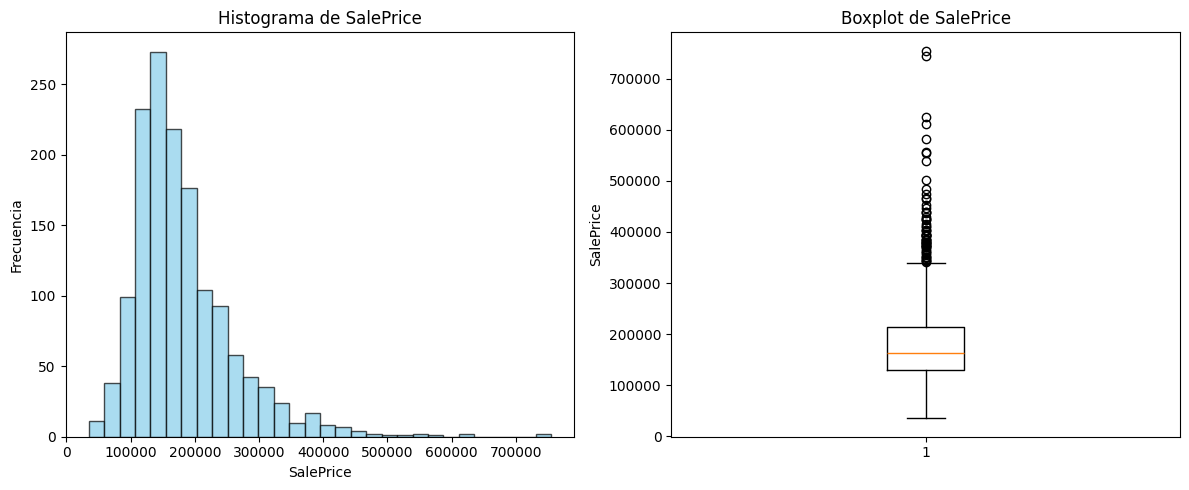

In [6]:
#En base a un analisis general se decidio mover estas variables a las cuantitativas para hacer una tabla de frecuencia. 
variables_a_mover = [
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'GarageCars', 'KitchenAbvGr', 'YrSold', 'Fireplaces'
]

for var in variables_a_mover:
    if var in cuantitiativas:
        cuantitiativas.remove(var)
        cualitativas.append(var)


for col in cuantitiativas:
    print("***" + col + "***")
    funciones.prueba_de_normalidad(house_prices[col],col)
    print("\n")

In [7]:
# for col in cualitativas:
#     print("***" + col + "***")
#     funciones.frecuencias(house_prices[col], col)
#     print("\n")

#### Análisis de grupos

In [8]:
import random
import pyclustertend 
import sklearn

In [9]:
# Procesamiento de categoricas
cat_houses = funciones.trans_categorical(house_prices)
num_houses = cat_houses.select_dtypes(include=[float, int])
X = funciones.preprocess(num_houses).dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    524 non-null    int64  
 1   LotFrontage   524 non-null    float64
 2   LotArea       524 non-null    int64  
 3   Alley         524 non-null    int32  
 4   LotShape      524 non-null    int32  
 5   OverallQual   524 non-null    int64  
 6   OverallCond   524 non-null    int64  
 7   YearBuilt     524 non-null    int64  
 8   YearRemodAdd  524 non-null    int64  
 9   MasVnrType    524 non-null    int32  
 10  ExterQual     524 non-null    int64  
 11  ExterCond     524 non-null    int64  
 12  BsmtQual      524 non-null    float64
 13  TotalBsmtSF   524 non-null    int64  
 14  HeatingQC     524 non-null    int64  
 15  1stFlrSF      524 non-null    int64  
 16  GrLivArea     524 non-null    int64  
 17  BsmtFullBath  524 non-null    int64  
 18  BsmtHalfBath  524 non-null    int6

In [10]:
results_df = funciones.test_random_clusters(X, num_tests=1000, min_cols=3, max_cols=5, random_state=531)
print(results_df.head(10))

                                               Columns  Hopkins_Stat
572  [MoSold, GrLivArea, LotFrontage, YrSold, Kitch...      0.366874
423       [LotArea, TotalBsmtSF, BsmtHalfBath, MoSold]      0.352115
220                       [LotArea, GrLivArea, MoSold]      0.321489
514         [LotArea, GarageArea, LotFrontage, YrSold]      0.307387
470                [LotArea, YrSold, SalePrice, Alley]      0.302574
93           [PoolQC, YrSold, LotFrontage, GarageArea]      0.297427
199                         [PoolQC, GrLivArea, Alley]      0.295881
814      [GrLivArea, YrSold, LotFrontage, GarageYrBlt]      0.294164
137                         [MoSold, 1stFlrSF, YrSold]      0.290849
356                 [ExterCond, KitchenAbvGr, LotArea]      0.285118


In [11]:
import itertools

columns = ['LotArea', 'SalePrice', 'Fence', 'MoSold', 'LotFrontage', 'Alley', 'GarageArea']
comb_3_cols = list(itertools.combinations(columns, 3))
hopkins_results = {}

# Evaluar la estadística de Hopkins para cada combinación de columnas
for comb in comb_3_cols:
    random.seed(123)  # Mantener reproducibilidad en cada iteración

    # Seleccionar las columnas
    X_subset = X[list(comb)].dropna()  # Elimina filas con NaN

    if X_subset.shape[0] == 0:  # Si eliminamos todas las filas, saltamos esta combinación
        continue
    
    # Escalar los datos
    X_scale = sklearn.preprocessing.scale(X_subset)

    # Calcular la estadística de Hopkins
    hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
    
    # Guardar el resultado en el diccionario
    hopkins_results[comb] = hopkins_stat


# Convertir resultados a DataFrame y ordenarlos de mayor a menor Hopkins
results_df = pd.DataFrame(hopkins_results.items(), columns=['Columnas', 'Hopkins'])
results_df = results_df.sort_values(by='Hopkins', ascending=False)

# Mostrar las mejores combinaciones
print(results_df.head(10))

                             Columnas   Hopkins
19   (SalePrice, MoSold, LotFrontage)  0.365868
11      (LotArea, MoSold, GarageArea)  0.361950
1        (LotArea, SalePrice, MoSold)  0.354471
32  (MoSold, LotFrontage, GarageArea)  0.350483
17          (SalePrice, Fence, Alley)  0.320620
16    (SalePrice, Fence, LotFrontage)  0.312821
22    (SalePrice, LotFrontage, Alley)  0.311904
21    (SalePrice, MoSold, GarageArea)  0.310730
3         (LotArea, SalePrice, Alley)  0.302366
7             (LotArea, Fence, Alley)  0.294925


In [12]:
comb1 = ['SalePrice', 'MoSold', 'LotFrontage']
comb2 = ['LotArea', 'SalePrice', 'MoSold']
comb3 = ['LotArea', 'MoSold', 'GarageArea']

X_cluster1 = X[comb1].dropna()
X_cluster2 = X[comb2].dropna()
X_cluster3 = X[comb3].dropna()

X_scale1 = sklearn.preprocessing.scale(X_cluster1)
X_scale2 = sklearn.preprocessing.scale(X_cluster2)
X_scale3 = sklearn.preprocessing.scale(X_cluster3)

# pyclustertend.vat(X_scale1)
# pyclustertend.vat(X_scale2)
# pyclustertend.vat(X_scale3)

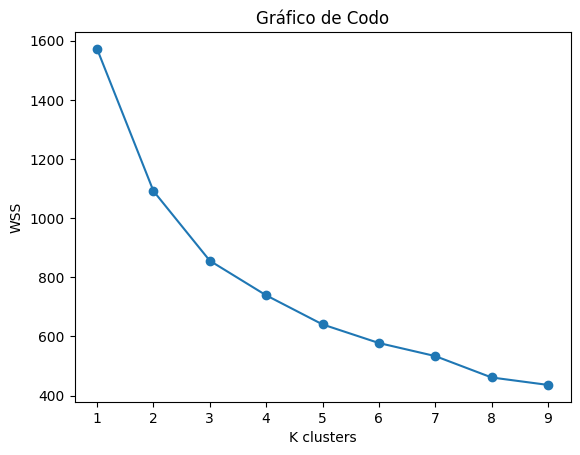

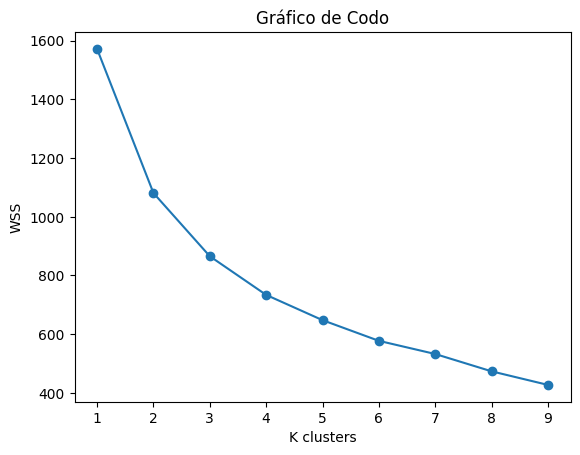

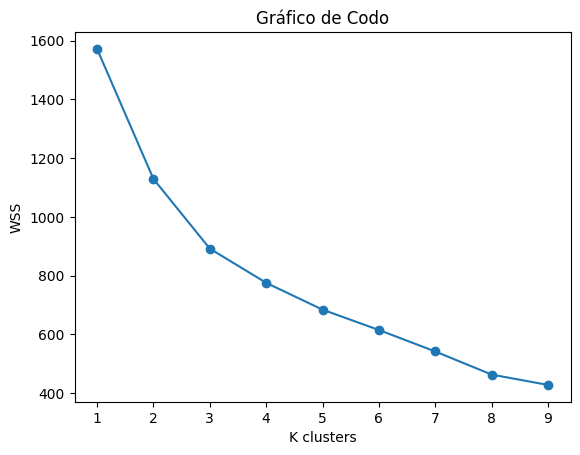

In [13]:
funciones.elbow(X_scale1)
funciones.elbow(X_scale2)
funciones.elbow(X_scale3)

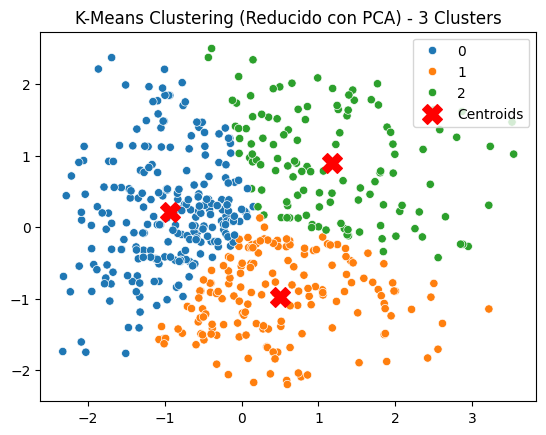

In [14]:
import sklearn
from sklearn.decomposition import PCA
import seaborn as sns

cluster_amount = 3
X_pca1 = PCA(n_components=2).fit_transform(X_scale1)
km = sklearn.cluster.KMeans(n_clusters=cluster_amount, random_state=42).fit(X_pca1)
centroides = km.cluster_centers_
X_cluster1['Cluster'] = km.labels_

sns.scatterplot(x=X_pca1[:, 0], y=X_pca1[:, 1], hue=X_cluster1['Cluster'], palette="tab10", legend="full")
# Plot centroids
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label="Centroids")

plt.title(f"K-Means Clustering (Reducido con PCA) - 3 Clusters")
plt.legend()
plt.show()

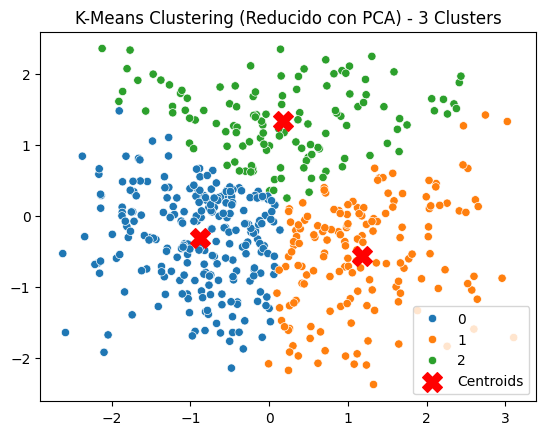

In [15]:
cluster_amount = 3
X_pca2 = PCA(n_components=2).fit_transform(X_scale2)
km = sklearn.cluster.KMeans(n_clusters=cluster_amount, random_state=42).fit(X_pca2)
centroides = km.cluster_centers_
X_cluster2['Cluster'] = km.labels_

sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=X_cluster2['Cluster'], palette="tab10", legend="full")
# Plot centroids
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label="Centroids")

plt.title(f"K-Means Clustering (Reducido con PCA) - 3 Clusters")
plt.legend()
plt.show()

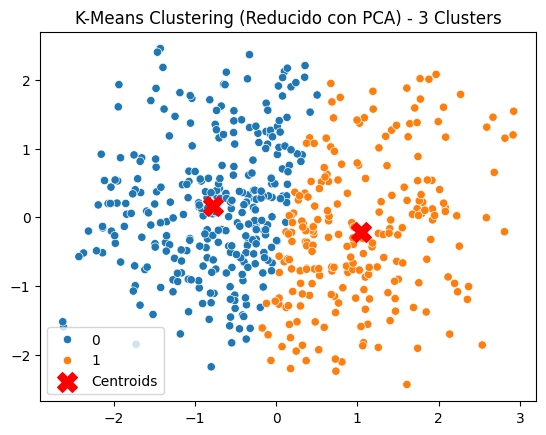

In [16]:
cluster_amount = 2
X_pca3 = PCA(n_components=2).fit_transform(X_scale3)
km = sklearn.cluster.KMeans(n_clusters=cluster_amount, random_state=42).fit(X_pca3)
centroides = km.cluster_centers_
X_cluster3['Cluster'] = km.labels_

sns.scatterplot(x=X_pca3[:, 0], y=X_pca3[:, 1], hue=X_cluster3['Cluster'], palette="tab10", legend="full")
# Plot centroids
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label="Centroids")

plt.title(f"K-Means Clustering (Reducido con PCA) - 3 Clusters")
plt.legend()
plt.show()

In [17]:
# funciones.sillhouette([3,4,5,6,7],X_scale1)

In [18]:
# funciones.sillhouette([3,4,5,6,7],X_scale2)

In [19]:
# funciones.sillhouette([2,3,4,5,6,7],X_scale3)

In [20]:
# funciones.plotFeatures1(X_cluster1,3)

In [21]:
# funciones.plotFeatures2(X_cluster2,3)

In [22]:
# funciones.plotFeatures3(X_cluster3,2)

### PARTE 2: ANALISIS LINEAL

####  Model univariado 1: lot area vs Sale Price

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = MinMaxScaler(feature_range=(0, 1))
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    524 non-null    int64  
 1   LotFrontage   524 non-null    float64
 2   LotArea       524 non-null    int64  
 3   Alley         524 non-null    int32  
 4   LotShape      524 non-null    int32  
 5   OverallQual   524 non-null    int64  
 6   OverallCond   524 non-null    int64  
 7   YearBuilt     524 non-null    int64  
 8   YearRemodAdd  524 non-null    int64  
 9   MasVnrType    524 non-null    int32  
 10  ExterQual     524 non-null    int64  
 11  ExterCond     524 non-null    int64  
 12  BsmtQual      524 non-null    float64
 13  TotalBsmtSF   524 non-null    int64  
 14  HeatingQC     524 non-null    int64  
 15  1stFlrSF      524 non-null    int64  
 16  GrLivArea     524 non-null    int64  
 17  BsmtFullBath  524 non-null    int64  
 18  BsmtHalfBath  524 non-null    int6

Text(0, 0.5, 'Sale Price ($)')

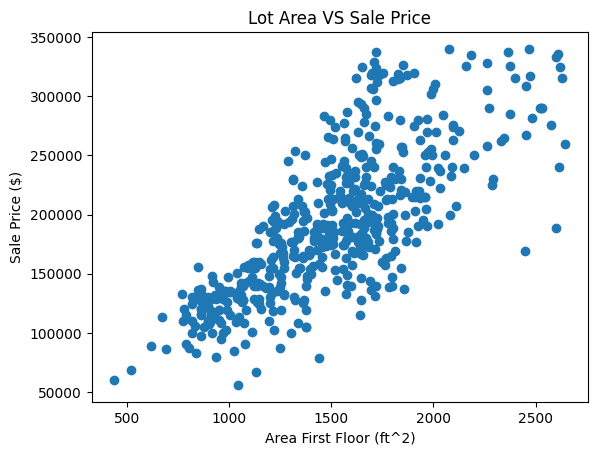

In [24]:
plt.figure()
plt.scatter(X['GrLivArea'],X['SalePrice'])
plt.title("Lot Area VS Sale Price")
plt.xlabel("Area First Floor (ft^2)")
plt.ylabel("Sale Price ($)")

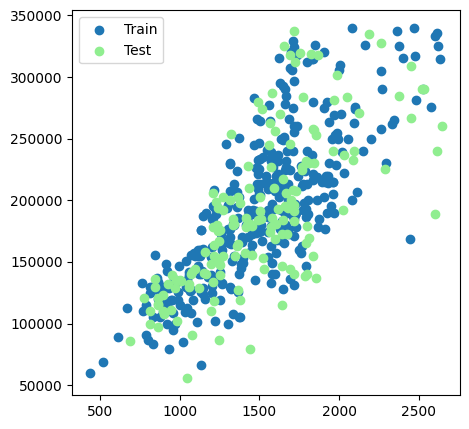

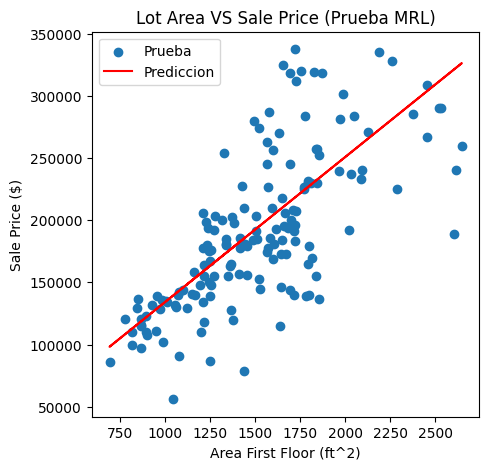

EQ: sale_price = 116.6773*lot_area +17554.6483 
Mean Squared Error: 1933564010.32
R squared: 0.50
Max Real: [189000]
Max Predicho: [321032.27107763]
Max Diferencia: [132032.27107763]
Residuales: p = 0.0022 (No Normal)


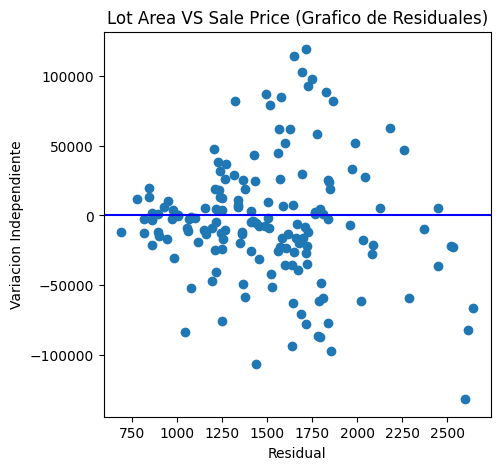

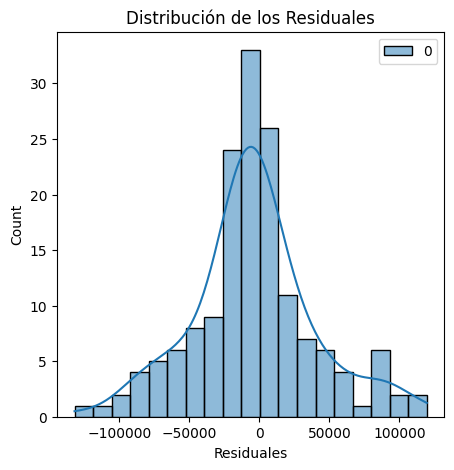

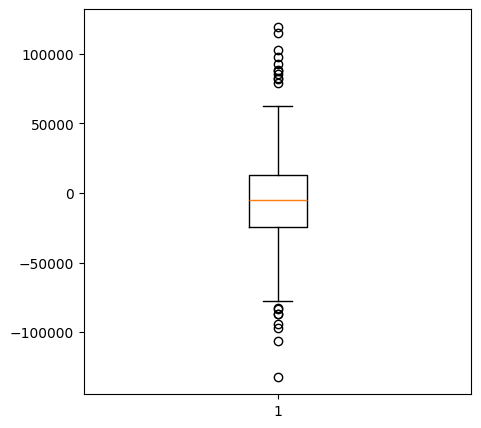

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     564.8
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           4.84e-76
Time:                        22:06:22   Log-Likelihood:                -4379.3
No. Observations:                 366   AIC:                             8763.
Df Residuals:                     364   BIC:                             8770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.755e+04   7621.515      2.303      0.0

In [25]:
import mrl_func
mrl_func.linear_analysis(X, 'GrLivArea')

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
mrl_X = X[['GrLivArea','SalePrice']]
mrl_y = X['SalePrice']
X_train, X_test,y_train, y_test= train_test_split(
    mrl_X, mrl_y,
    test_size=0.3, train_size=0.7,
    random_state=42)

ind = X_train['GrLivArea'].values.reshape(-1,1)
ind_t = X_test['GrLivArea'].values.reshape(-1,1)
dep = y_train.values.reshape(-1,1)
dep_t = y_test.values.reshape(-1,1)

lm = LinearRegression()
lm.fit(ind, dep) # Entreno en train
dep_pred = lm.predict(ind_t)
mrl_func.metricas_regresion(ind, dep_t,dep_pred,lm)

explained_variance:  0.5006
mean_squared_log_error:  0.0539
r2:  0.4964
MAE:  31956.4141
MSE:  1933564010.3241
RMSE:  43972.3096
AIC:  7828.0429
BIC:  7831.9455


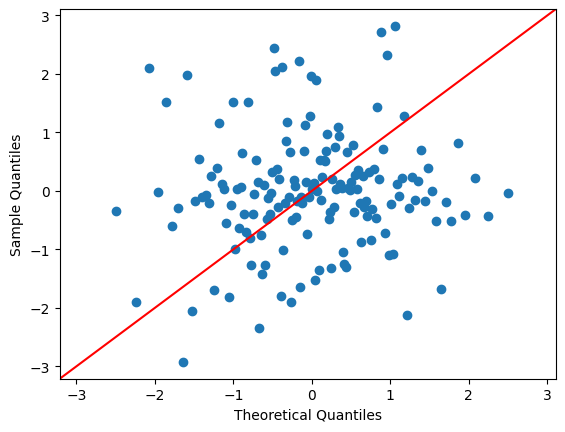

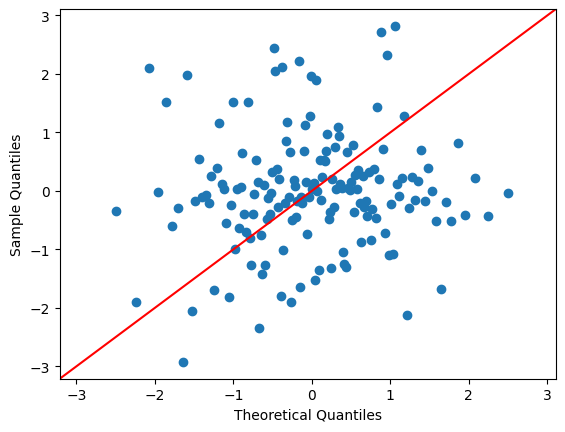

In [145]:
resid = dep_t-dep_pred
resid_standardized = (resid - np.mean(resid)) / np.std(resid)
sm.qqplot(resid_standardized,line='45')

## Modelo Multivariado

In [27]:
print(X.columns)
num_data = X[X.columns]
num_data.dropna()
y_multi = num_data.pop('SalePrice')
X_multi = num_data
X_train, X_test,y_train, y_test = train_test_split(X_multi, y_multi,test_size=0.3,train_size=0.7, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PoolQC', 'Fence', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')
(366, 35)
(158, 35)
(366,)
(158,)


In [28]:
model_m = LinearRegression()
model_m.fit(X_train, y_train)
y_pred = model_m.predict(X_test)
len(model_m.get_params())
sm.OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          6.04e-147
Time:                        22:16:07   Log-Likelihood:                -4135.6
No. Observations:                 366   AIC:                             8331.
Df Residuals:                     336   BIC:                             8448.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MSSubClass      11.7581     50.138      0.235      0.815     -86.865     110.382
LotFrontage    207.6310     97.637      2.127      0.034      15.574     399.688
LotArea          0.9343      0.568      1.646      0.101      -0.182       2.051
Alley        -3.908e+04   2.47e+05     -0.158      0.874   -5.24e+05    4.46e+05
LotShape      -996.2574    822.680     -1.211      0.227   -2614.509     621.994
OverallQual   1.197e+04   1776.076      6.742      0.000    8480.927    1.55e+04
OverallCond   6131.1826   2119.705      2.892      0.004    1961.618    1.03e+04
YearBuilt      248.8886    120.790      2.060      0.040      11.288     486.489
YearRemodAdd    49.9061    108.296      0.461      0.645    -163.118     262.930
MasVnrType    1020.7996   1383.528      0.738      0.461   -1700.668    3742.267
ExterQual     2902.4408   3671.721      0.790      0.430   -4320.015    1.01e+04
ExterCond    -5.862e+04    3.7e+05     -0.158      0.874   -7.87e+05    6.69e+05
BsmtQual      5751.5218   3022.333      1.903      0.058    -193.556    1.17e+04
TotalBsmtSF     45.6281     11.859      3.848      0.000      22.301      68.955
HeatingQC     1154.2030   1759.823      0.656      0.512   -2307.457    4615.863
1stFlrSF       -25.3774     12.239     -2.074      0.039     -49.451      -1.304
GrLivArea       63.0002      7.713      8.168      0.000      47.829      78.172
BsmtFullBath  1.501e+04   2380.109      6.305      0.000    1.03e+04    1.97e+04
BsmtHalfBath  1.959e-10   1.23e-09      0.159      0.873   -2.22e-09    2.61e-09
FullBath     -4056.4590   4258.122     -0.953      0.341   -1.24e+04    4319.476
HalfBath     -2815.0859   4441.648     -0.634      0.527   -1.16e+04    5921.854
BedroomAbvGr -3622.4997   2715.963     -1.334      0.183   -8964.934    1719.934
KitchenAbvGr -1.954e+04   1.23e+05     -0.158      0.874   -2.62e+05    2.23e+05
KitchenQual   5021.8307   3262.576      1.539      0.125   -1395.818    1.14e+04
TotRmsAbvGrd  -501.6087   1672.051     -0.300      0.764   -3790.616    2787.398
Fireplaces    -375.2068   5199.551     -0.072      0.943   -1.06e+04    9852.567
FireplaceQu   1997.6000   1587.917      1.258      0.209   -1125.911    5121.111
GarageYrBlt    -91.1786    116.280     -0.784      0.434    -319.907     137.550
GarageFinish  -630.4249   1952.653     -0.323      0.747   -4471.390    3210.540
GarageCars    2715.0937   4208.800      0.645      0.519   -5563.824     1.1e+04
GarageArea      33.5538     15.026      2.233      0.026       3.998      63.110
PoolQC                0          0        nan        nan           0           0
Fence                 0          0        nan        nan           0           0
MoSold          39.2831    428.224      0.092      0.927    -803.055     881.622
YrSold        -123.7595    849.253     -0.146      0.884   -1794.282    1546.763
=====

In [29]:
mrl_func.metricas_regresion(X_train,y_test, y_pred, model_m)

explained_variance:  0.8988
mean_squared_log_error:  0.0133
r2:  0.8982
MAE:  15500.8321
MSE:  390813735.2864
RMSE:  19769.0095
AIC:  7310.8494
BIC:  7447.4416


Text(0, 0.5, 'Residuales')

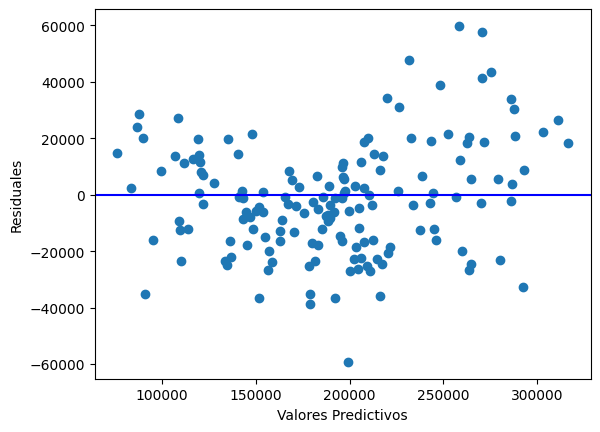

In [148]:
resid_modelo1=y_test-y_pred
plt.scatter(y_pred,resid_modelo1)
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

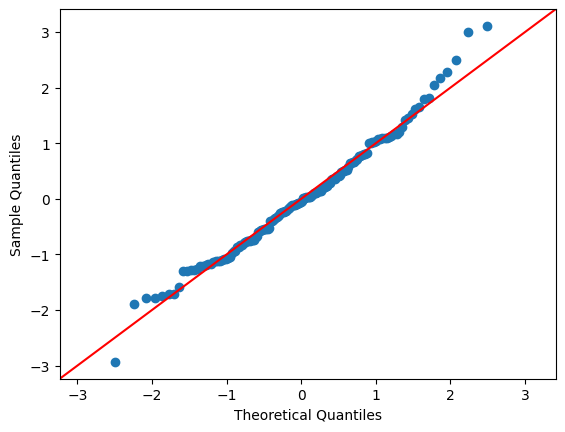

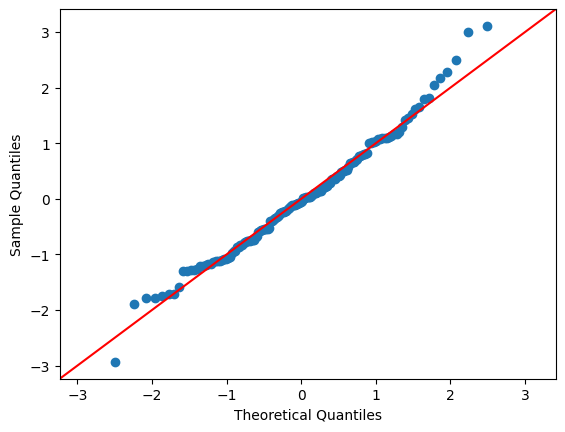

In [149]:
resid_standardized = (resid_modelo1 - np.mean(resid_modelo1)) / np.std(resid_modelo1)
sm.qqplot(resid_standardized,line='45')

In [151]:
stat, p = stats.shapiro(resid_standardized)
print(f"Residuales: p = {p:.4f} {'(No Normal)' if p < 0.05 else '(Normal)'}")

Residuales: p = 0.1554 (Normal)


## Multiolinealidad

In [169]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


c:\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


         Feature        VIF
0     MSSubClass   2.153281
1    LotFrontage   2.054254
2        LotArea   1.979811
3          Alley   0.000000
4       LotShape   1.230583
5    OverallQual   4.437739
6    OverallCond   1.709132
7      YearBuilt  10.265640
8   YearRemodAdd   4.292282
9     MasVnrType   1.382165
10     ExterQual   3.435491
11     ExterCond   0.000000
12      BsmtQual   3.430978
13   TotalBsmtSF  13.774053
14     HeatingQC   2.040281
15      1stFlrSF  13.335854
16     GrLivArea   8.628253
17  BsmtFullBath   1.229705
18  BsmtHalfBath        NaN
19      FullBath   3.934465
20      HalfBath   4.086651
21  BedroomAbvGr   2.910650
22  KitchenAbvGr   0.000000
23   KitchenQual   3.737035
24  TotRmsAbvGrd   4.429645
25    Fireplaces   7.636446
26   FireplaceQu   7.654880
27   GarageYrBlt   7.392591
28  GarageFinish   2.115697
29    GarageCars   5.977019
30    GarageArea   6.070420
31        PoolQC        NaN
32         Fence        NaN
33        MoSold   1.157290
34        YrSold   1

c:\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


## Sobreajuste

In [167]:
r2_train = model_m.score(X_train, y_train)
r2_test= model_m.score(X_test, y_test)
print(f"R2 Train: {r2_train:.4f}")
print(f"R2 Test: {r2_test:.4f}")

R2 Train: 0.8965
R2 Test: 0.8982


## Modelo Multiple Ajustado

In [31]:
weird_vif = ['Alley', 'ExterCond','BsmtHalfBath', 'KitchenAbvGr', 'PoolQC', 'Fence']
X_ad = X[X.columns]
X_ad = X_ad[[col for col in X_ad.columns if col not in weird_vif]]
y_multi = X_ad.pop('SalePrice')
X_multi = X_ad
X_train, X_test,y_train, y_test = train_test_split(X_multi, y_multi,test_size=0.3,train_size=0.7, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model_ma = LinearRegression()
model_ma.fit(X_train, y_train)
y_pred = model_ma.predict(X_test)
len(model_ma.get_params())
sm.OLS(y_train,X_train).fit().summary()

(366, 29)
(158, 29)
(366,)
(158,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1226.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):                   1.83e-322
Time:                        22:17:39   Log-Likelihood:                         -4135.6
No. Observations:                 366   AIC:                                      8329.
Df Residuals:                     337   BIC:                                      8442.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MSSubClass      11.5070     50.040      0.230      0.818     -86.923     109.937
LotFrontage    206.8772     97.380      2.124      0.034      15.328     398.426
LotArea          0.9264      0.565      1.641      0.102      -0.184       2.037
LotShape      -997.8394    821.428     -1.215      0.225   -2613.612     617.933
OverallQual   1.197e+04   1773.303      6.750      0.000    8482.171    1.55e+04
OverallCond   6122.0331   2115.851      2.893      0.004    1960.094    1.03e+04
YearBuilt      247.3667    120.233      2.057      0.040      10.864     483.869
YearRemodAdd    48.8840    107.948      0.453      0.651    -163.452     261.220
MasVnrType    1019.2712   1381.492      0.738      0.461   -1698.162    3736.704
ExterQual     2870.6251   3660.917      0.784      0.434   -4330.502    1.01e+04
BsmtQual      5790.6638   3007.855      1.925      0.055    -125.872    1.17e+04
TotalBsmtSF     45.6414     11.841      3.854      0.000      22.349      68.934
HeatingQC     1159.5775   1756.950      0.660      0.510   -2296.392    4615.547
1stFlrSF       -25.3963     12.220     -2.078      0.038     -49.434      -1.359
GrLivArea       63.0406      7.697      8.190      0.000      47.900      78.182
BsmtFullBath  1.504e+04   2369.093      6.348      0.000    1.04e+04    1.97e+04
FullBath     -3972.3013   4218.735     -0.942      0.347   -1.23e+04    4326.070
HalfBath     -2808.9332   4435.049     -0.633      0.527   -1.15e+04    5914.933
BedroomAbvGr -3599.5588   2708.174     -1.329      0.185   -8926.614    1727.496
KitchenQual   5062.3375   3247.832      1.559      0.120   -1326.241    1.15e+04
TotRmsAbvGrd  -524.8147   1663.211     -0.316      0.753   -3796.397    2746.767
Fireplaces    -346.7558   5188.926     -0.067      0.947   -1.06e+04    9860.009
FireplaceQu   1981.9456   1582.545      1.252      0.211   -1130.965    5094.856
GarageYrBlt    -91.5156    116.092     -0.788      0.431    -319.872     136.841
GarageFinish  -617.0649   1948.007     -0.317      0.752   -4448.850    3214.720
GarageCars    2705.7255   4202.293      0.644      0.520   -5560.304     1.1e+04
GarageArea      33.6399     14.994      2.244      0.026       4.146      63.134
MoSold          25.6012    418.817      0.061      0.951    -798.224     849.426
YrSold        -257.1634    109.594     -2.347      0.020    -472.738     -41.588
==============================================================================
Omnibus:                       50.691   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.947
Skew:                          -0.398   Prob(JB):                     8.86e-60
Kurtosis:                       7.147   Cond. No.                     5.64e+

In [91]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

         Feature           VIF
0     MSSubClass      7.354260
1    LotFrontage     42.058209
2        LotArea     27.485757
3       LotShape      3.333275
4    OverallQual    121.419315
5    OverallCond    114.365489
6      YearBuilt  50142.560320
7   YearRemodAdd  40696.586473
8     MasVnrType      9.667346
9      ExterQual     81.064643
10      BsmtQual     64.293433
11   TotalBsmtSF    171.025987
12     HeatingQC     55.708364
13      1stFlrSF    193.987251
14     GrLivArea    125.939981
15  BsmtFullBath      2.042299
16      FullBath     47.048871
17      HalfBath      6.588546
18  BedroomAbvGr     53.339675
19   KitchenQual     68.657787
20  TotRmsAbvGrd    106.957732
21    Fireplaces     16.285712
22   FireplaceQu     16.801936
23   GarageYrBlt  46895.999625
24  GarageFinish     15.682784
25    GarageCars     64.258060
26    GarageArea     57.366204
27        MoSold      7.542560
28        YrSold  42703.890281


In [92]:
mrl_func.metricas_regresion(X_train, y_test, y_pred, model_ma)

explained_variance:  0.8988
mean_squared_log_error:  0.0133
r2:  0.8982
MAE:  15500.8321
MSE:  390813735.2864
RMSE:  19769.0095
AIC:  7298.8494
BIC:  7412.0258


In [130]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import cross_validate
X_train_scaled = scaler.fit_transform(X_train)
from sklearn.model_selection import ShuffleSplit
alphas = np.logspace(-15, 2, num=50)
ridge = make_pipeline(StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))


cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, X_train_scaled, y_train,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)
train_error = -cv_results["train_score"]
print(f"Error medio cuadrado de la regresión con datos de entrenamiento:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

test_error = -cv_results["test_score"]
print(f"Error medio cuadrado de la regresion con los datos de prueba:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")
mse_alphas = [est[-1].cv_values_.mean(axis=0)
            for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas


Error medio cuadrado de la regresión con datos de entrenamiento:
382360711.973 ± 20571304.353
Error medio cuadrado de la regresion con los datos de prueba:
463989206.734 ± 176366554.816


c:\Python312\Lib\site-packages\sklearn\utils\deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


,1.000000e-15,2.222996e-15,4.941713e-15,1.098541e-14,2.442053e-14,5.428675e-14,1.206793e-13,2.682696e-13,5.963623e-13,1.325711e-12,2.947052e-12,6.551286e-12,1.456348e-11,3.237458e-11,7.196857e-11,1.599859e-10,3.556480e-10,7.906043e-10,1.757511e-09,3.906940e-09,8.685114e-09,1.930698e-08,4.291934e-08,9.540955e-08,2.120951e-07,4.714866e-07,1.048113e-06,2.329952e-06,5.179475e-06,1.151395e-05,2.559548e-05,5.689866e-05,1.264855e-04,2.811769e-04,6.250552e-04,1.389495e-03,3.088844e-03,6.866488e-03,1.526418e-02,3.393222e-02,7.543120e-02,1.676833e-01,3.727594e-01,8.286428e-01,1.842070e+00,4.094915e+00,9.102982e+00,2.023590e+01,4.498433e+01,1.000000e+02
0,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761602e+08,4.761601e+08,4.761600e+08,4.761597e+08,4.761592e+08,4.761580e+08,4.761552e+08,4.761491e+08,4.761356e+08,4.761058e+08,4.760398e+08,4.758960e+08,4.755888e+08,4.749636e+08,4.738166e+08,4.721267e+08,4.706264e+08,4.710942e+08,4.762541e+08,4.921375e+08
1,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841514e+08,4.841513e+08,4.841512e+08,4.841510e+08,4.841504e+08,4.841492e+08,4.841465e+08,4.841406e+08,4.841274e+08,4.840982e+08,4.840338e+08,4.838934e+08,4.835937e+08,4.829848e+08,4.818688e+08,4.802142e+08,4.786617e+08,4.787992e+08,4.832580e+08,4.979798e+08
2,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834183e+08,4.834182e+08,4.834182e+08,4.834181e+08,4.834178e+08,4.834173e+08,4.834160e+08,4.834133e+08,4.834072e+08,4.833938e+08,4.833640e+08,4.832983e+08,4.831551e+08,4.828498e+08,4.822311e+08,4.811086e+08,4.795150e+08,4.783657e+08,4.798859e+08,4.873909e+08,5.070359e+08
3,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738953e+08,4.738952e+08,4.738951e+08,4.738948e+08,4.738943e+08,4.738930e+08,4.738903e+08,4.738842e+08,4.738706e+08,4.738404e+08,4.737741e+08,4.736293e+08,4.733207e+08,4.726951e+08,4.715570e+08,4.699154e+08,4.685730e+08,4.694600e+08,4.756318e+08,4.934590e+08
4,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188281e+08,4.188280e+08,4.188277e+08,4.188272e+08,4.188261e+08,4.188235e+08,4.188179e+08,4.188055e+08,4.187779e+08,4.187171e+08,4.185845e+08,4.183024e+08,4.177330e+08,4.167104e+08,4.153050e+08,4.144753e+08,4.164485e+08,4.244624e+08,4.446428e+08


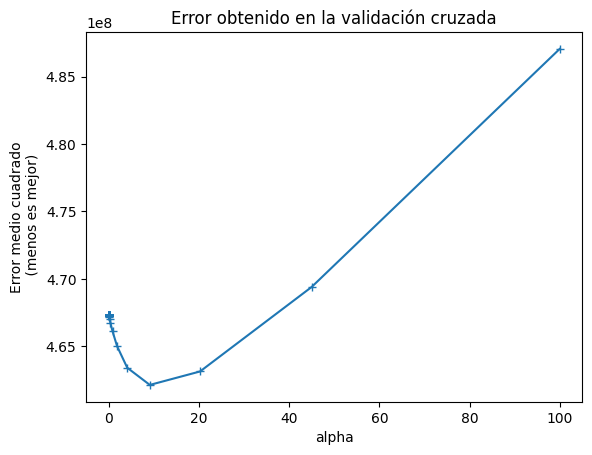

In [131]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Error medio cuadrado\n (menos es mejor)")
plt.xlabel("alpha")
_ = plt.title("Error obtenido en la validación cruzada")

In [132]:
mejores_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
mejores_alphas

[9.102981779915227,
 9.102981779915227,
 9.102981779915227,
 9.102981779915227,
 9.102981779915227]

In [129]:
print(f"El mejor alfa es:\n"
      f"{np.mean(mejores_alphas):.2f} ± {np.std(mejores_alphas):.2f}")

El mejor alfa es:
11.24 ± 4.07


In [137]:
alfa_modelo3 = np.mean(mejores_alphas)
ridge = Ridge(alpha=alfa_modelo3)
ridge.fit(X_train_scaled, y_train)

# Predict the target values on the testing set
X_test_scaled = scaler.transform(X_test)
y_pred_ridge = ridge.predict(X_test_scaled)

In [140]:
mrl_func.metricas_regresion(X_test_scaled, y_test, y_pred_ridge, ridge)

explained_variance:  0.8735
mean_squared_log_error:  0.014
r2:  0.8729
MAE:  17148.1366
MSE:  487937471.5784
RMSE:  22089.3067
AIC:  3218.9003
BIC:  3307.7155


Text(0, 0.5, 'Residuales')

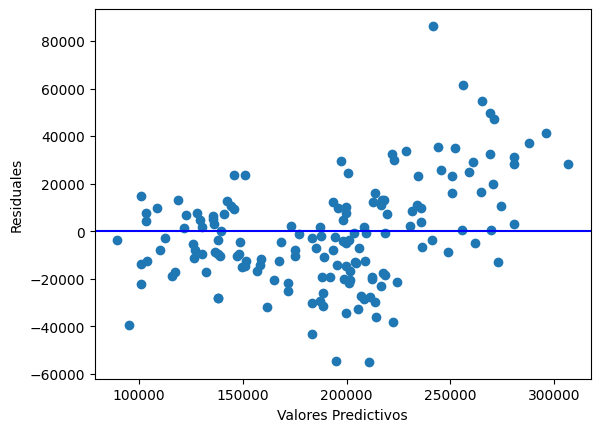

In [141]:
resid_ridge=y_test-y_pred_ridge
plt.scatter(y_pred_ridge,resid_ridge)
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

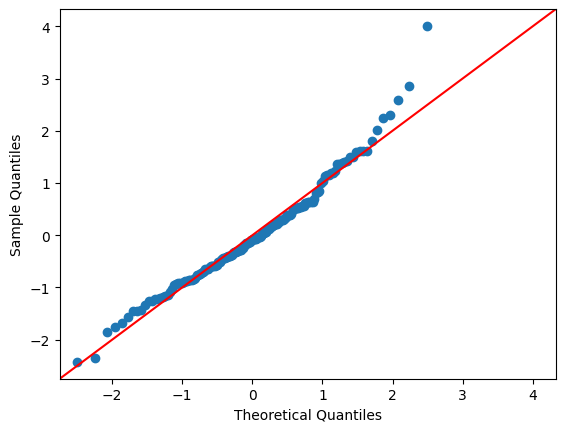

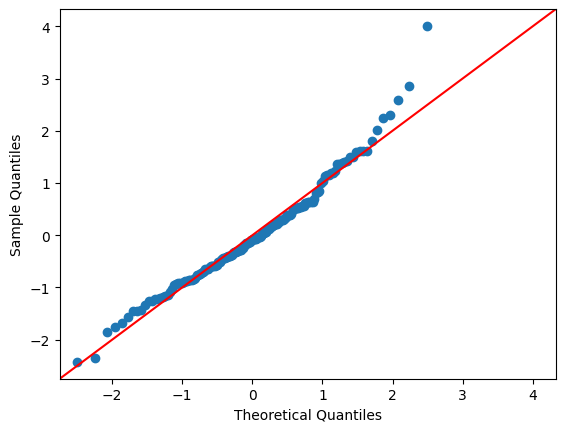

In [103]:
resid_standardized = (resid_ridge - np.mean(resid_ridge)) / np.std(resid_ridge)
sm.qqplot(resid_standardized,line='45')